In [1]:
import os
import numpy as np
import SimpleITK as sitk
import sys
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt

from collections import Counter
import h5py

from sklearn.model_selection import StratifiedKFold, KFold

# Import data

In [2]:
# Find directory of all files
cwd = os.path.normpath(os.getcwd() + os.sep + os.pardir)
train_path = os.path.join(cwd, 'Data\\train')
test_path = os.path.join(cwd, 'Data\\test')
reader = sitk.ImageSeriesReader()

train_path_nbr = os.listdir(train_path)

train_file_list = []
train_file_dict = {}
for dir_ in train_path_nbr:
    dir_to_exp = os.path.join(train_path, dir_)
    for dirpath, subdirs, files in os.walk(dir_to_exp):
        if files:
            train_file_list.append((dirpath, files, dir_))
            train_file_dict[dirpath] = files
    
test_path_nbr = os.listdir(test_path)
test_file_list = []
test_file_dict = {}
for dir_ in test_path_nbr:
    dir_to_exp = os.path.join(test_path, dir_)
    for dirpath, subdirs, files in os.walk(dir_to_exp):
        if files:
            test_file_list.append((dirpath, files, dir_))
            test_file_dict[dirpath] = files

print(len(train_path_nbr))
print(len(train_file_dict))

print(len(test_path_nbr))
print(len(test_file_dict))

912
1738
411
743


# Import labels

In [3]:
# Look at the labels of the images
excel_labels_path = os.path.join(cwd, 'Data\\train.csv')
print(excel_labels_path)
df = pd.read_csv(excel_labels_path)
df

C:\Users\Killian\Jupyter\UNIFESP_body_part_classification\Data\train.csv


,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240...,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483...,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852...,3
...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920...,14
1734,1.2.826.0.1.3680043.8.498.99727280485333900933...,11
1735,1.2.826.0.1.3680043.8.498.99935008698914755885...,3
1736,1.2.826.0.1.3680043.8.498.99969671777553755311...,2


# Match directories and labels of training data

In [4]:
# Match directories to labels
dir_unique_label_list = []
dir_multi_label_list = []
all_label_list = []
for (dirpath, files, dir_) in train_file_list:
    for file in files:
        file_name = file[:-6]
        label = df['Target'].loc[df['SOPInstanceUID'] == file_name]
        labels = list(label.values)[0]
        labels = labels.split(' ')
        labels = [int(lab) for lab in labels if lab != '']
        img_path = dirpath + '\\' + file
        
        if len(labels) == 1:
            dir_unique_label_list.append([dir_, labels, img_path])
        else:
            dir_multi_label_list.append([dir_, labels, img_path])
        all_label_list.append([dir_, labels, img_path])

print(len(dir_unique_label_list))
print(len(dir_multi_label_list))
print(len(all_label_list))
print(dir_multi_label_list[0])

1606
132
1738
['1005', [9, 21], 'C:\\Users\\Killian\\Jupyter\\UNIFESP_body_part_classification\\Data\\train\\1005\\1.2.826.0.1.3680043.8.498.61746690124118892528305417421864320307\\1.2.826.0.1.3680043.8.498.21605553573167556338806385057474412247\\1.2.826.0.1.3680043.8.498.75243637122822422802803455060201037925-c.dcm']


In [5]:
test_data_list = []
for (dirpath, files, dir_) in test_file_list:
    for file in files:
        file_name = file[:-6]
        img_path = dirpath + '\\' + file
        test_data_list.append([dir_, file, img_path])
print(len(test_data_list))

743


# Distribution of unique labels for cross validation

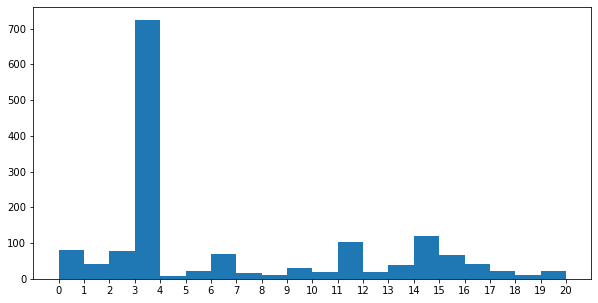

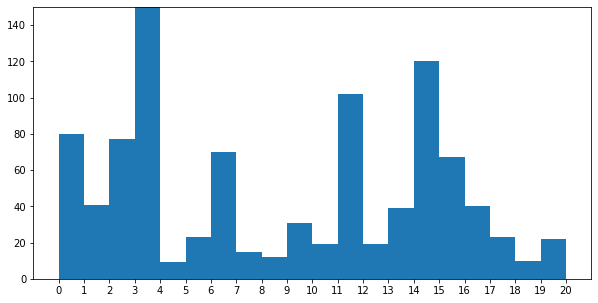

In [6]:
labels = [list_[1] for list_ in dir_unique_label_list]
labels = list(map(int, chain.from_iterable(labels)))
plt.figure(figsize=(10, 5))
plt.hist(labels, bins=np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(labels, bins=np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
plt.ylim(0, 150)
plt.show()

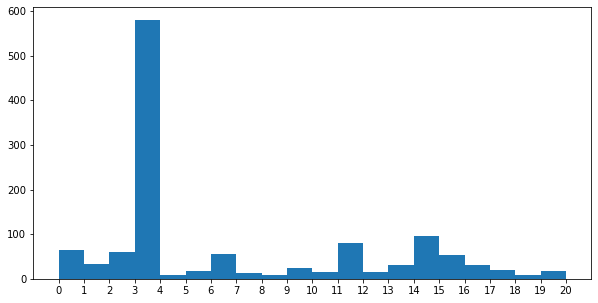

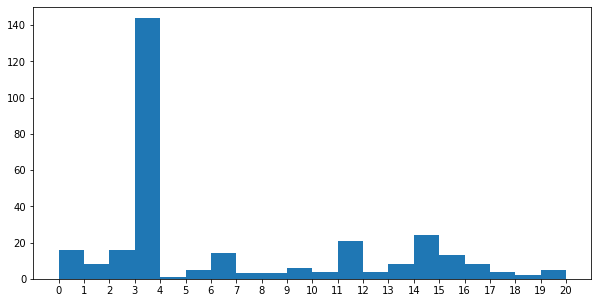

In [7]:
# stratified distribution of unique labels
skf = StratifiedKFold(n_splits=5)
y = [list_[1] for list_ in dir_unique_label_list]
y = np.array(y)

X = [list_[2] for list_ in dir_unique_label_list]
X = np.array(X)

skf.get_n_splits(X, y)
X_train_uniq_list = []
X_valid_uniq_list = []
y_train_uniq_list = []
y_valid_uniq_list = []
for train_index, valid_index in skf.split(X, y):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    X_train_uniq_list.append(X_train)
    X_valid_uniq_list.append(X_valid)
    y_train_uniq_list.append(y_train)
    y_valid_uniq_list.append(y_valid)
    
    
plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(y_valid, bins=np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
plt.ylim(0, 150)
plt.show()

# Distribution of multilabels for cross validation

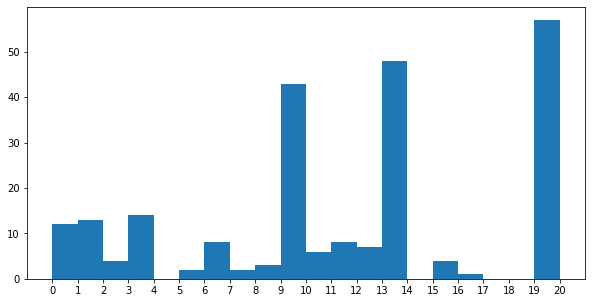

In [8]:
labels = [list_[1] for list_ in dir_multi_label_list]
labels = list(map(int, chain.from_iterable(labels)))
plt.figure(figsize=(10, 5))
plt.hist(labels, bins=np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
plt.show()


In [9]:
# stratified distribution of unique labels
kf = KFold(n_splits=5)
y = [list_[1] for list_ in dir_multi_label_list]
y = np.array(y)

X = [list_[2] for list_ in dir_multi_label_list]
X = np.array(X)

kf.get_n_splits(X, y)

X_train_mlti_list = []
X_valid_mlti_list = []
y_valid_mlti_list = []
y_train_mlti_list = []
for train_index, valid_index in kf.split(X, y):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    X_train_mlti_list.append(X_train)
    X_valid_mlti_list.append(X_valid)
    y_train_mlti_list.append(y_train)
    y_valid_mlti_list.append(y_valid)


C:\Users\Killian\anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


# Saving training data for 5-folds cross validation

In [95]:
saving_path = cwd + '\Data'

for fold in range(5):
    print(y_valid_mlti_list[fold].shape)
    print(y_valid_uniq_list[fold].shape)
    X_train = np.concatenate((X_train_mlti_list[fold], X_train_uniq_list[fold]), axis=0)                      
    X_valid = np.concatenate((X_valid_mlti_list[fold], X_valid_uniq_list[fold]), axis=0) 
    y_valid = np.concatenate((y_valid_mlti_list[fold], np.reshape(y_valid_uniq_list[fold], -1)), axis=0) 
    y_train = np.concatenate((y_train_mlti_list[fold], np.reshape(y_train_uniq_list[fold], -1)), axis=0) 

    
    X_train = [dir_.encode("utf-8") for dir_ in X_train]
    X_valid = [dir_.encode("utf-8") for dir_ in X_valid]
    y_train = [str(lab).encode("utf-8") for lab in y_train]
    y_valid = [str(lab).encode("utf-8") for lab in y_valid]
    
    Folder = h5py.File(saving_path + "/Folder_" + str(fold) + ".hdf5", "w")

    X_train = Folder.create_dataset("X_train", data=np.asarray(X_train))
    X_valid = Folder.create_dataset("X_valid", data=np.asarray(X_valid))
    y_train = Folder.create_dataset("y_train",  data=np.asarray(y_train))
    y_valid = Folder.create_dataset("y_valid",  data=np.asarray(y_valid))
    
    Folder.close()


(27,)
(322, 1)
(27,)
(321, 1)
(26,)
(321, 1)
(26,)
(321, 1)
(26,)
(321, 1)


# Save training data paths/labels as hdf5

In [12]:
df = pd.DataFrame(all_label_list, columns=['Folder nbr', 'label', 'dir'])
labels = list(df.label)
directory = list(df.dir)
saving_path = cwd + '\Data'

Folder = h5py.File(saving_path + "/train_data.hdf5", "w")
directory = [dir_.encode("utf-8") for dir_ in directory]
labels = [str(lab).encode("utf-8") for lab in labels]


directories = Folder.create_dataset("Directories", data=np.asarray(directory))
labels = Folder.create_dataset("Labels",  data=np.asarray(labels))
Folder.close()

# Save test data as hdf5

In [43]:
df_test = pd.DataFrame(test_data_list, columns=['Folder nbr', 'UID', 'dir'])
UIDS = list(df_test.UID)
directories = list(df_test.dir)
df_test

,Folder nbr,UID,dir
0,100,1.2.826.0.1.3680043.8.498.88649350262556129168...,C:\Users\Killian\Jupyter\UNIFESP_body_part_cla...
1,100,1.2.826.0.1.3680043.8.498.94130497688965633824...,C:\Users\Killian\Jupyter\UNIFESP_body_part_cla...
2,100,1.2.826.0.1.3680043.8.498.34619370857497917679...,C:\Users\Killian\Jupyter\UNIFESP_body_part_cla...
3,100,1.2.826.0.1.3680043.8.498.71110032779393208873...,C:\Users\Killian\Jupyter\UNIFESP_body_part_cla...
4,1001,1.2.826.0.1.3680043.8.498.11011430294387286375...,C:\Users\Killian\Jupyter\UNIFESP_body_part_cla...
...,...,...,...
738,99,1.2.826.0.1.3680043.8.498.31290186664002299165...,C:\Users\Killian\Jupyter\UNIFESP_body_part_cla...
739,991,1.2.826.0.1.3680043.8.498.70719726337678250017...,C:\Users\Killian\Jupyter\UNIFESP_body_part_cla...
740,995,1.2.826.0.1.3680043.8.498.95782775733904328949...,C:\Users\Killian\Jupyter\UNIFESP_body_part_cla...
741,998,1.2.826.0.1.3680043.8.498.10394589813208835226...,C:\Users\Killian\Jupyter\UNIFESP_body_part_cla...


In [44]:
saving_path = cwd + '\Data'

Folder = h5py.File(saving_path + "/test_data.hdf5", "w")
directories = [dir_.encode("utf-8") for dir_ in directories]
UIDS = [str(elem).encode("utf-8") for elem in UIDS]

directories = Folder.create_dataset("Directories", data=np.asarray(directories))
UIDS = Folder.create_dataset("UIDS",  data=np.asarray(UIDS))
Folder.close()

In [38]:
# import ast
# Folder = h5py.File(saving_path + "/data.hdf5", "r+")
# directories = np.char.decode(Folder["/Directories"][()])
# labels = np.char.decode(Folder["/Labels"][()])
# # directories = [ast.literal_eval(dict_iter.decode('utf-8')) for dict_iter in directories]

# directories = np.char.decode(CV_4_Folder["/Train_images"][()])
# directories = [ast.literal_eval(dict_iter.decode('utf-8')) for dict_iter in directories]
# Folder.close()